In [2]:
import pandas as pd

# Load the cleaned GDP data
gdp_data = pd.read_csv('D:/week10 data/cleaned_gdp_data.csv', parse_dates=['Date'])

# Load the Brent oil prices data
brent_prices = pd.read_csv('D:/week10 data/brentoilprices.csv', parse_dates=['Date'])

# Inspect the datasets
print(gdp_data.head())
print(brent_prices.head())


C:\Users\Robel\AppData\Local\Temp\ipykernel_7692\1811127339.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_prices = pd.read_csv('D:/week10 data/brentoilprices.csv', parse_dates=['Date'])


                  Country Name Country Code     Indicator Name  \
0                        Aruba          ABW  GDP (current US$)   
1  Africa Eastern and Southern          AFE  GDP (current US$)   
2                  Afghanistan          AFG  GDP (current US$)   
3   Africa Western and Central          AFW  GDP (current US$)   
4                       Angola          AGO  GDP (current US$)   

   Indicator Code       Date           GDP  
0  NY.GDP.MKTP.CD 1987-01-01  4.877095e+08  
1  NY.GDP.MKTP.CD 1987-01-01  1.902745e+11  
2  NY.GDP.MKTP.CD 1987-01-01           NaN  
3  NY.GDP.MKTP.CD 1987-01-01  1.122948e+11  
4  NY.GDP.MKTP.CD 1987-01-01  8.084412e+09  
        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


C:\Users\Robel\AppData\Local\Temp\ipykernel_11212\1072385944.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_prices = pd.read_csv('D:/week10 data/brentoilprices.csv', parse_dates=['Date'])


                  Country Name Country Code     Indicator Name  \
0                        Aruba          ABW  GDP (current US$)   
1  Africa Eastern and Southern          AFE  GDP (current US$)   
2                  Afghanistan          AFG  GDP (current US$)   
3   Africa Western and Central          AFW  GDP (current US$)   
4                       Angola          AGO  GDP (current US$)   

   Indicator Code       Date           GDP  
0  NY.GDP.MKTP.CD 1987-01-01  4.877095e+08  
1  NY.GDP.MKTP.CD 1987-01-01  1.902745e+11  
2  NY.GDP.MKTP.CD 1987-01-01           NaN  
3  NY.GDP.MKTP.CD 1987-01-01  1.122948e+11  
4  NY.GDP.MKTP.CD 1987-01-01  8.084412e+09  
        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63
        Date  Price Country Name Country Code Indicator Name Indicator Code  \
0 1987-05-20  18.63          NaN          NaN            NaN            NaN   
1 1987-05-21  18.45          NaN          NaN          

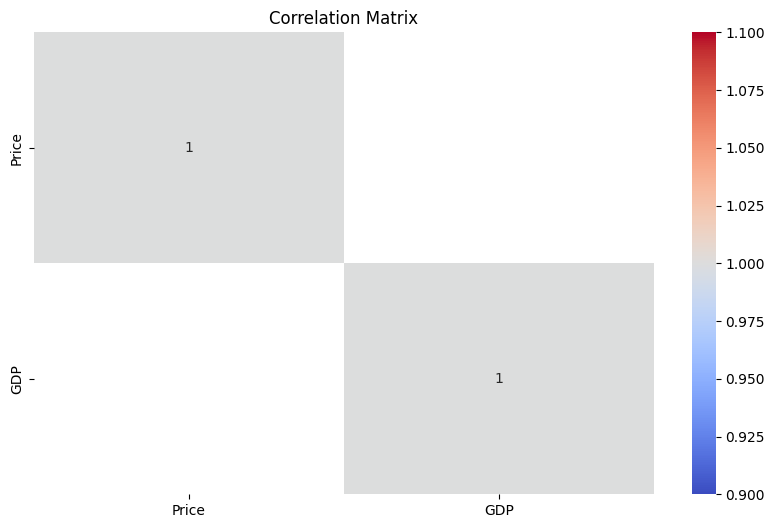

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned GDP data and Brent oil prices data
gdp_data = pd.read_csv('D:/week10 data/cleaned_gdp_data.csv', parse_dates=['Date'])
brent_prices = pd.read_csv('D:/week10 data/brentoilprices.csv', parse_dates=['Date'])

# Inspect the data
print(gdp_data.head())
print(brent_prices.head())

# Merge the datasets based on the 'Date' column
merged_data = pd.merge(brent_prices, gdp_data, on='Date', how='left')

# Inspect the merged data
print(merged_data.head())

# Filter for numeric columns only
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [4]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model_arima = ARIMA(merged_data['Price'], order=(5, 1, 0))
results_arima = model_arima.fit()

# Summary of ARIMA model
print(results_arima.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9276
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14833.824
Date:                Mon, 24 Feb 2025   AIC                          29679.649
Time:                        17:59:31   BIC                          29722.459
Sample:                             0   HQIC                         29694.194
                               - 9276                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0260      0.006      4.472      0.000       0.015       0.037
ar.L2         -0.0236      0.005     -4.360      0.000      -0.034      -0.013
ar.L3         -0.0071      0.005     -1.542      0.1

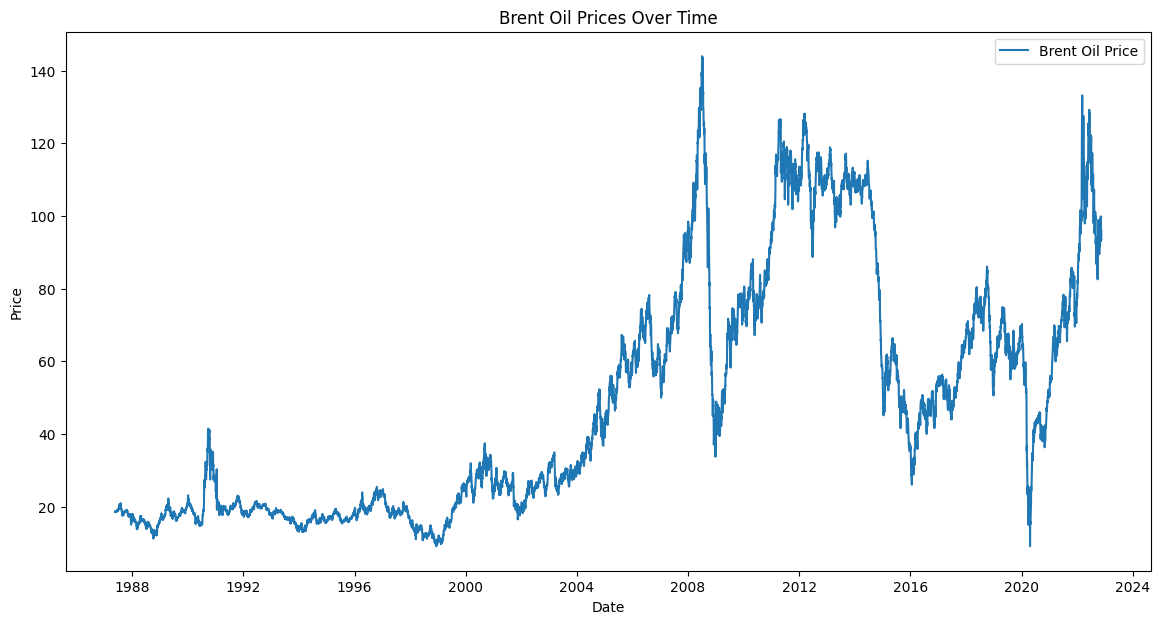

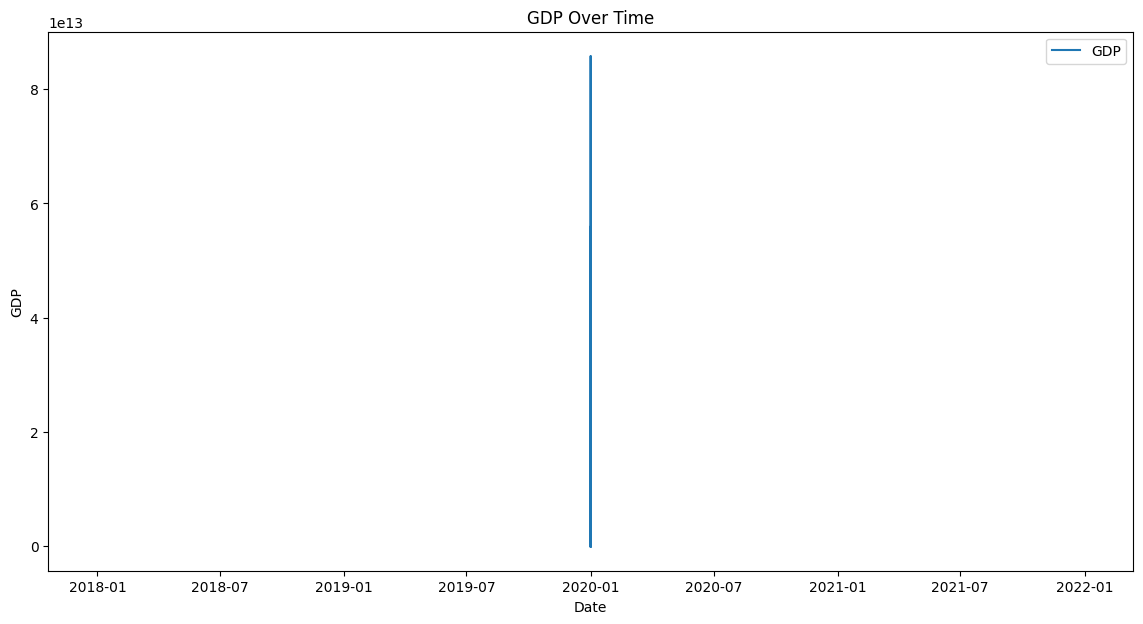

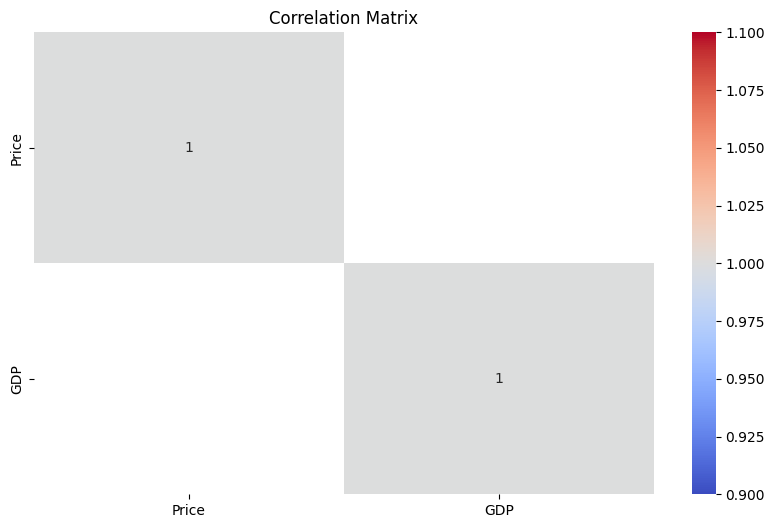

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Brent oil prices over time
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'], merged_data['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Brent Oil Prices Over Time')
plt.legend()
plt.show()

# Plot GDP over time
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'], merged_data['GDP'], label='GDP')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('GDP Over Time')
plt.legend()
plt.show()

# Correlation heatmap
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [12]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR
from statsmodels.tsa.regime_switching.markov_switching import MarkovSwitching
import torch
import torch.nn as nn

# Define the device to be used (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Prepare the data for LSTM training
input_size = 1
hidden_size = 50
num_layers = 1
output_size = 1
learning_rate = 0.001

# Prepare the data for training (adjust as needed)
train_data = torch.FloatTensor(merged_data['Price'].values).view(-1, input_size, 1).to(device)

# Initialize the LSTM model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop (simplified)
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    
    outputs = model(train_data)
    optimizer.zero_grad()
    
    # Calculate loss (adjust as needed for correct target values)
    loss = criterion(outputs, train_data.view(-1, output_size))
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation and prediction (adjust as needed)
model.eval()
with torch.no_grad():
    predicted = model(train_data).cpu().numpy()

# Print predictions (adjust as needed for your task)
print(predicted)


Epoch [10/100], Loss: 3472.3425
Epoch [20/100], Loss: 3447.7407
Epoch [30/100], Loss: 3417.9331
Epoch [40/100], Loss: 3379.6208
Epoch [50/100], Loss: 3336.0154
Epoch [60/100], Loss: 3293.2261
Epoch [70/100], Loss: 3241.9922
Epoch [80/100], Loss: 3170.6702
Epoch [90/100], Loss: 3091.5212
Epoch [100/100], Loss: 3027.0369
[[3.7493508]
 [3.73725  ]
 [3.7439923]
 ...
 [4.9095235]
 [4.912065 ]
 [4.9086647]]


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the LSTM model
model.eval()
with torch.no_grad():
    predicted = model(train_data).cpu().numpy()

# Convert the actual data to numpy
actual = train_data.cpu().numpy().reshape(-1, 1)

# Calculate evaluation metrics
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, predicted)
r2 = r2_score(actual, predicted)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R-squared: {r2:.4f}')


RMSE: 54.9624
MAE: 44.6385
R-squared: -1.8520


In [16]:
# Save the model's state dictionary
model_path = 'D:/week10 data/lstm_model.pth'
torch.save(model.state_dict(), model_path)
print(f'Model saved to {model_path}')

Model saved to D:/week10 data/lstm_model.pth


In [17]:
# Load the saved model state dictionary
model_path = 'D:/week10 data/lstm_model.pth'
model.load_state_dict(torch.load(model_path))
model.eval()
print('Model loaded successfully')

Model loaded successfully


In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
arima_model = ARIMA(merged_data['Price'], order=(5, 1, 0))
arima_results = arima_model.fit()

# Print the model summary
print(arima_results.summary())

# Forecast future values
arima_forecast = arima_results.forecast(steps=30)
print(arima_forecast)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9276
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14833.824
Date:                Mon, 24 Feb 2025   AIC                          29679.649
Time:                        18:40:10   BIC                          29722.459
Sample:                             0   HQIC                         29694.194
                               - 9276                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0260      0.006      4.472      0.000       0.015       0.037
ar.L2         -0.0236      0.005     -4.360      0.000      -0.034      -0.013
ar.L3         -0.0071      0.005     -1.542      0.1

In [19]:
from statsmodels.tsa.arima.model import ARIMA
import joblib

# Fit the ARIMA model
arima_model = ARIMA(merged_data['Price'], order=(5, 1, 0))
arima_results = arima_model.fit()

# Save the ARIMA model
arima_model_path = 'D:/week10 data/arima_model.pkl'
joblib.dump(arima_results, arima_model_path)
print(f'ARIMA model saved to {arima_model_path}')


ARIMA model saved to D:/week10 data/arima_model.pkl


In [21]:
import pandas as pd
from statsmodels.tsa.api import VAR
import joblib

# Load the data
gdp_data = pd.read_csv('D:/week10 data/cleaned_gdp_data.csv', parse_dates=['Date'])
brent_prices = pd.read_csv('D:/week10 data/brentoilprices.csv', parse_dates=['Date'])

# Merge the datasets based on the 'Date' column
merged_data = pd.merge(brent_prices, gdp_data, on='Date', how='left')

# Fill missing GDP values using forward fill method
merged_data['GDP'].fillna(method='ffill', inplace=True)

# Prepare the data for VAR
var_data = merged_data[['Price', 'GDP']].dropna()

# Check for constant columns and remove them
constant_columns = [col for col in var_data.columns if var_data[col].nunique() == 1]
var_data = var_data.drop(columns=constant_columns)

# Fit a VAR model
var_model = VAR(var_data)
var_results = var_model.fit(maxlags=5)

# Save the VAR model
var_model_path = 'D:/week10 data/var_model.pkl'
joblib.dump(var_results, var_model_path)
print(f'VAR model saved to {var_model_path}')


C:\Users\Robel\AppData\Local\Temp\ipykernel_11212\3079092552.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_prices = pd.read_csv('D:/week10 data/brentoilprices.csv', parse_dates=['Date'])
C:\Users\Robel\AppData\Local\Temp\ipykernel_11212\3079092552.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['GDP'].fillna(method='ffill', inplace=True)
C:\Users\Robel\AppData\

VAR model saved to D:/week10 data/var_model.pkl


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the LSTM model
model.eval()
with torch.no_grad():
    predicted = model(train_data).cpu().numpy()

# Convert the actual data to numpy
actual = train_data.cpu().numpy().reshape(-1, 1)

# Calculate evaluation metrics
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, predicted)
r2 = r2_score(actual, predicted)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R-squared: {r2:.4f}')

# Save the model's state dictionary
model_path = 'D:/week10 data/lstm_model.pth'
torch.save(model.state_dict(), model_path)
print(f'Model saved to {model_path}')


RMSE: 54.9624
MAE: 44.6385
R-squared: -1.8520
Model saved to D:/week10 data/lstm_model.pth


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Load the ARIMA model
arima_model_path = 'D:/week10 data/arima_model.pkl'
arima_results = joblib.load(arima_model_path)

# Make predictions using the ARIMA model
arima_predictions = arima_results.predict(start=0, end=len(merged_data['Price'])-1)

# Calculate evaluation metrics for ARIMA
arima_mse = mean_squared_error(merged_data['Price'], arima_predictions)
arima_rmse = np.sqrt(arima_mse)
arima_mae = mean_absolute_error(merged_data['Price'], arima_predictions)
arima_r2 = r2_score(merged_data['Price'], arima_predictions)

print(f'ARIMA RMSE: {arima_rmse:.4f}')
print(f'ARIMA MAE: {arima_mae:.4f}')
print(f'ARIMA R-squared: {arima_r2:.4f}')


ARIMA RMSE: 1.2131
ARIMA MAE: 0.7300
ARIMA R-squared: 0.9986


In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import pandas as pd
from statsmodels.tsa.api import VAR

# Load the data
gdp_data = pd.read_csv('D:/week10 data/cleaned_gdp_data.csv', parse_dates=['Date'])
brent_prices = pd.read_csv('D:/week10 data/brentoilprices.csv', parse_dates=['Date'])

# Merge the datasets based on the 'Date' column
merged_data = pd.merge(brent_prices, gdp_data, on='Date', how='left')

# Fill missing GDP values using forward fill method
merged_data['GDP'].fillna(method='ffill', inplace=True)

# Prepare the data for VAR
var_data = merged_data[['Price', 'GDP']].dropna()

# Check for constant columns and remove them
constant_columns = [col for col in var_data.columns if var_data[col].nunique() == 1]
var_data = var_data.drop(columns=constant_columns)

# Fit a VAR model
var_model = VAR(var_data)
var_results = var_model.fit(maxlags=5)

# Save the VAR model
var_model_path = 'D:/week10 data/var_model.pkl'
joblib.dump(var_results, var_model_path)
print(f'VAR model saved to {var_model_path}')

# Load the VAR model
var_results = joblib.load(var_model_path)

# Forecast future values using the fitted VAR model
n_forecast_steps = 30
var_forecast = var_results.forecast(var_results.endog[-var_results.k_ar:], steps=n_forecast_steps)

# Extract the actual and forecasted Price values
actual_price = var_data['Price'].values[-n_forecast_steps:]
forecasted_price = var_forecast[:, 0]  # The first column corresponds to Price

# Calculate evaluation metrics for VAR
var_mse = mean_squared_error(actual_price, forecasted_price)
var_rmse = np.sqrt(var_mse)
var_mae = mean_absolute_error(actual_price, forecasted_price)
var_r2 = r2_score(actual_price, forecasted_price)

print(f'VAR Model Evaluation:')
print(f'RMSE: {var_rmse:.4f}')
print(f'MAE: {var_mae:.4f}')
print(f'R-squared: {var_r2:.4f}')


C:\Users\Robel\AppData\Local\Temp\ipykernel_11212\4140248041.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_prices = pd.read_csv('D:/week10 data/brentoilprices.csv', parse_dates=['Date'])


VAR model saved to D:/week10 data/var_model.pkl
VAR Model Evaluation:
RMSE: 3.0577
MAE: 2.4088
R-squared: -0.4974


C:\Users\Robel\AppData\Local\Temp\ipykernel_11212\4140248041.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['GDP'].fillna(method='ffill', inplace=True)
C:\Users\Robel\AppData\Local\Temp\ipykernel_11212\4140248041.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['GDP'].fillna(method='ffill', inplace=True)
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning